# Chapter 04
# 벡터공간 - The Vector Space

### 4.1.1 선형결합의 정의

* **Definition 4.1.1** : $v_1, …,v_n$ 각각을 벡터라고 하면, $v_1, …,v_n$ 의 *선형결합* 을 다음과 같은 합이라고 정의하자.

  $$\alpha_1v_1+ \cdots +\alpha_nv_n$$

  여기서, $\alpha_1,…,\alpha_n$은 스칼라이다. 이 선형결합에서 $\alpha_1,…,\alpha_n$ 각각은 *계수*라고 한다. $\alpha_1$은 $v_1$의 계수이고, $\alpha_2$는 $v_2$ 의 계수이며, ..., $\alpha_n$은 $v_n$의 계수이다.

### 4.1.2 선형결합의 사용

***Example 4.1.5 평균얼굴*** - p.126 <br />
이미지의 평균을 선형결합으로 나타낼 수 있다.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [9]:
# 이미지 파일 불러오기
u = Image.open('./images/img01.PNG')
v = Image.open('./images/img02.PNG')
w = Image.open('./images/img03.PNG')
u = u.convert('L')
v = v.convert('L')
w = w.convert('L')
v = v.resize(u.size)  # 이미지 사이즈를 u의 사이즈와 같게 맞추기
w = w.resize(u.size)

# 이미지 파일을 np.asarray를 이용해 배열로 만들기
u = np.asarray(u, dtype='float32')
v = np.asarray(v, dtype='float32')
w = np.asarray(w, dtype='float32')

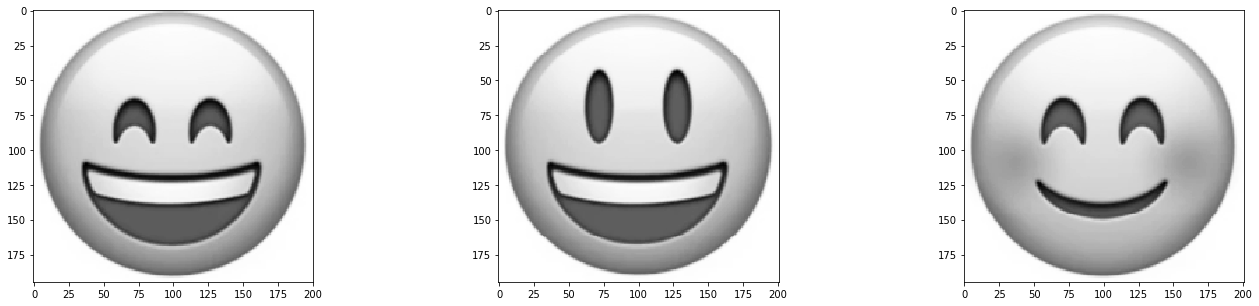

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(25, 5))
fig.subplots_adjust(hspace = .5, wspace=.001)

img_org = [u, v, w]

for i, img in enumerate(img_org):
    axs[i].imshow(img ,cmap='Greys_r')

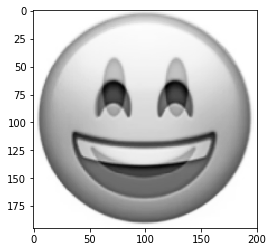

In [10]:
# 스칼라 (1/3)을 곱하여 선형결합 하기
lin_comb = (1/3) * (u + v + w)
plt.imshow(lin_comb, cmap='Greys_r')

### 4.1.3 계수에서 선형결합으로 

길이가 $n$인 벡터들의 리스트 $[v_1,…,v_n]$에 대해, 길이가 $n$인 계수들의 리스트 $[\alpha_1,...,\alpha_n]$를 대응하는 선형결합 $\alpha_1v_1+ \cdots +\alpha_nv_n$에 매핑하는 함수 $f$가 있다. 이 함수는 주어진 정의역(domain)원소에 대해 함수의 상(image, 함수값)을 찾는 문제라고 볼 수 있다. <br />
***Quiz 4.1.7*** `lin_comb(vlist, clist)`를 정의해 보자.

In [12]:
def lin_comb(vlist, clist):
    return sum([coeff * v for coeff, v in zip(vlist, clist)])

vlist = [1, 2, 3]
clist = [2, 2, 2]
lin_comb(vlist, clist)

12

## 4.2 생성(Span)

- **Definition** : 벡터들 $v_1,…,v_n$의 모든 선형결합으로 이루어진 집합을 이 벡터들의 **생성(Span)**이라 하고 $Span \{v_1, ...,v_n\}$ 라고 쓴다.

실수$\mathbb{R}$ 또는 복소수$\mathbb{C}$와 같은 무한 필드 위의 벡터들에 대해, Span은 보통 무한집합이다. 유한필드인 $GF(2)$상의 벡터들에 대한 Span은 유한하다.

***Quiz 4.2.2*** 필드 $GF(2)$상의 $Span\{[1,1],[0,1]\}$ 에 몇 개의 벡터가 있는가?

$$\begin{eqnarray} 0[1,1]+0[0,1] & = & [0,0] \\ 0[1,1]+1[0,1] & = & [0,1] \\ 1[1,1]+0[0,1] & = & [1,1] \\ 1[1,1]+1[0,1] & = & [1,0] \end{eqnarray}$$

***Quiz 4.2.4*** $2$-벡터들로 구성되는 집합에서 공집합$\emptyset $의 생성에는 몇 개의 벡터가 있는가?

빈 할당(empty assignment)으로 $[0, 0]$

***Quiz 4.2.5*** $\mathbb{R}$상의 $2$-벡터 $[2,3]$의 생성에는 몇 개의 벡터가 있는가?